In [183]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Set CUDA_VISIBLE_DEVICES to -1 to hide GPU devices

import tensorflow as tf

# Verify that the devices have been switched
print(tf.config.list_physical_devices('GPU'))  # This should print an empty list

# Build and train your model using the CPU
# ...


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [184]:

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
print(tf.__version__)

from keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG19,Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Activation,Dropout,GlobalAveragePooling2D,MaxPooling2D,RandomFlip,RandomZoom,RandomRotation

2.10.1


In [204]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32
IMG_SIZE = (32, 32)
directory = "dataset/"

# Create the training dataset
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)

validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

print(len(train_dataset))
# # Create an image data generator for augmentation
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
# ])

# # Augment the training dataset with mirror copies
# augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

# # Combine the original and augmented datasets
# train_dataset = train_dataset.concatenate(augmented_train_dataset)


Found 50000 files belonging to 10 classes.
Using 40000 files for training.
Found 50000 files belonging to 10 classes.
Using 10000 files for validation.
1250


In [205]:
print(len(train_dataset))

1250


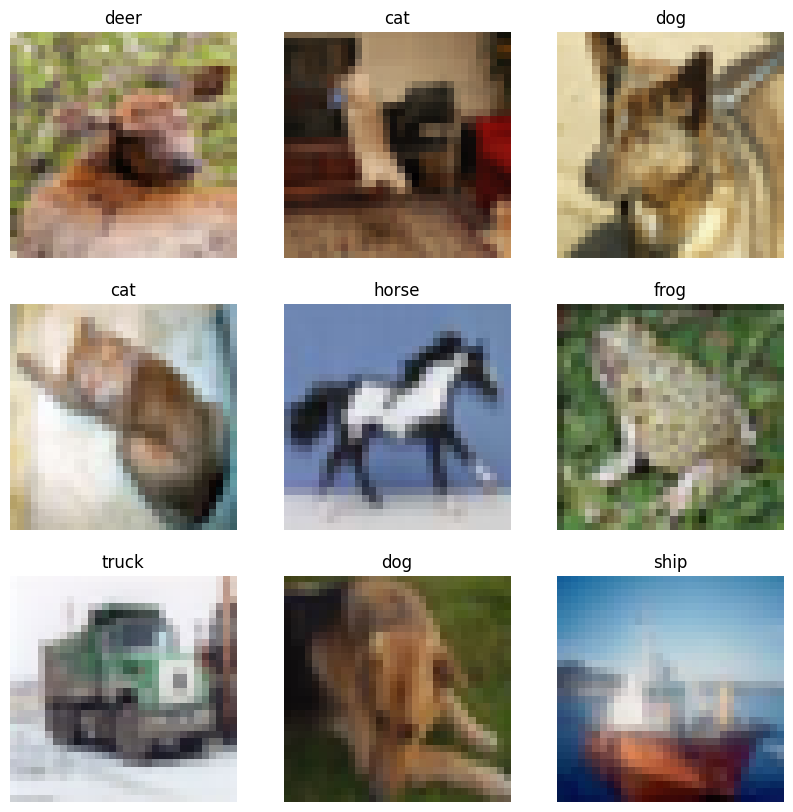

In [206]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [207]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [208]:
# UNQ_C1
# GRADED FUNCTION: data_augmenter
# def data_augmenter():
#     '''
#     Create a Sequential model composed of 2 layers
#     Returns:
#         tf.keras.Sequential
#     '''
#     ### START CODE HERE
#     data_augmentation = tf.keras.Sequential()
#     data_augmentation.add(RandomFlip('horizontal'))
# #     data_augment ation.add(RandomRotation(0.2))
#     ### END CODE HERE
    
#     return data_augmentation


data_augmentation = Sequential(
    [RandomFlip("horizontal"), 
     RandomRotation(0.1),
     RandomZoom(0.1)]
)

In [209]:
# data_augmentation = data_augmenter()

# Xception

In [210]:
# base_model = Xception(include_top=False, weights='imagenet', input_shape=(71,71,3), classes=10)
base_model = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3), classes=10)

In [211]:
# base_model.summary()

In [212]:
base_model.trainable = False

In [213]:
# data_augmentation = Sequential(
#     [RandomFlip("horizontal"), 
#      RandomRotation(0.1),
#      RandomZoom(0.1)]
# )

In [214]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224)))(inputs)
# x = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (71,71)))(inputs)
x = data_augmentation(x)
x = tf.keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# x = tf.keras.layers.Dense(64, activation=('softmax'))(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(10, activation=('softmax'))(x)
model = tf.keras.Model(inputs, outputs)

In [215]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 lambda_12 (Lambda)          (None, 224, 224, 3)       0         
                                                                 
 sequential_12 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_12 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 tf.math.subtract_12 (TFOpLa  (None, 224, 224, 3)      0         
 mbda)                                                           
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        208

In [216]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epochs = 4
if tf.config.list_physical_devices('GPU'):
    print('Training on GPU...')
    with tf.device('/GPU:0'):
        history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, verbose=1)
else:
    print('Training on CPU...')
    history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, verbose=1)
    
    
# Save the model
model.save('Xception_basic.h5')


Training on GPU...
Epoch 1/4
1250/1250 [==============================] - 893s 711ms/step - loss: 0.7752 - accuracy: 0.7390 - val_loss: 0.4261 - val_accuracy: 0.8558
Epoch 2/4
 591/1250 [=============>................] - ETA: 6:50 - loss: 0.6492 - accuracy: 0.7770

### Validation

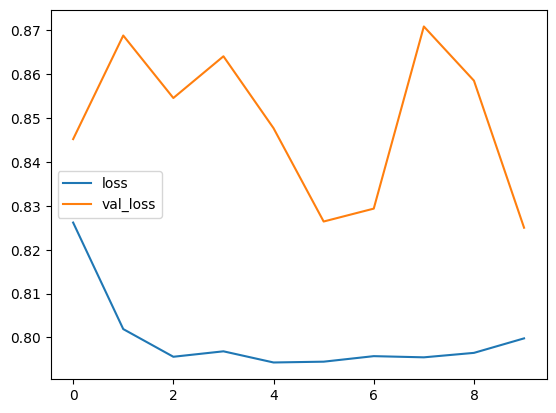

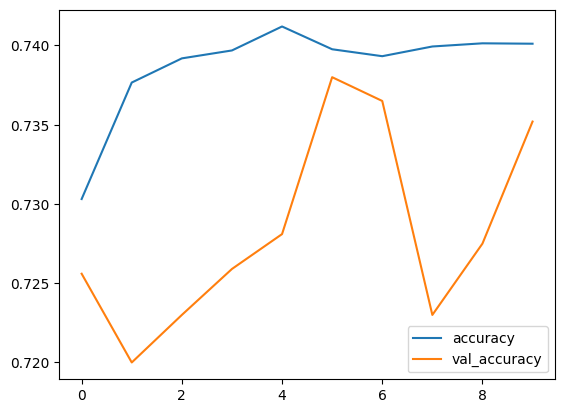

In [199]:
import pandas as pd

def plot_history(history):
    history_frame = pd.DataFrame(history.history)
    history_frame.loc[:, ['loss', 'val_loss']].plot()
    history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
    
    return
    
plot_history(history)

# Fine Tuning

In [200]:
base_model_2 = model.layers[4]

base_model_2.trainable = True
print("Number of layers in the base model: ", len(base_model_2.layers))

fine_tune_at = 126

for layer in base_model_2.layers[:fine_tune_at]:
    layer.trainable = False

base_model_2.summary()

Number of layers in the base model:  132
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 71, 71, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 35, 35, 32)   864         ['input_22[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 35, 35, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation)  (None, 35, 35, 32)

                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 9, 9, 728)   536536      ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 9, 9, 728)   2912        ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_41 (Conv2D)             (None, 5, 5, 728)    186368      ['add_119[0][0]']                
                                                                                                  
 block4_pool (MaxPooling2D)     (None, 5, 5, 728)    0           ['block4_sepconv2_bn[0][0]']     
          

 block7_sepconv1_bn (BatchNorma  (None, 5, 5, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 5, 5, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 5, 5, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv2_bn (BatchNorma  (None, 5, 5, 728)   2912        ['block7_sepconv2[0][0]']        
 lization)

                                                                                                  
 block10_sepconv1_act (Activati  (None, 5, 5, 728)   0           ['add_125[0][0]']                
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 5, 5, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 5, 5, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
                                                                                                  
 block10_s

 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 5, 5, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_128 (Add)                  (None, 5, 5, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_127[0][0]']                
                                                                                                  
 block13_sepconv1_act (Activati  (None, 5, 5, 728)   0           ['add_128[0][0]']                
 on)                                                                                              
          

In [201]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 lambda_11 (Lambda)          (None, 71, 71, 3)         0         
                                                                 
 tf.math.truediv_11 (TFOpLam  (None, 71, 71, 3)        0         
 bda)                                                            
                                                                 
 tf.math.subtract_11 (TFOpLa  (None, 71, 71, 3)        0         
 mbda)                                                           
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d_11  (None, 2048)             0  

In [202]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)



# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [203]:
epochs = 10
history2 = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, verbose=1)
# if tf.config.list_physical_devices('GPU'):
#     print('Training on GPU...')
#     with tf.device('/GPU:0'):
#         history2 = model2.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, verbose=1)
# else:
#     print('Training on CPU...')
#     history2 = model2.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, verbose=1)

Epoch 1/10
2500/2500 [==============================] - 174s 68ms/step - loss: 0.6537 - accuracy: 0.7752 - val_loss: 0.7280 - val_accuracy: 0.7584
Epoch 2/10
2500/2500 [==============================] - 177s 71ms/step - loss: 0.5434 - accuracy: 0.8091 - val_loss: 0.7000 - val_accuracy: 0.7680
Epoch 3/10
2500/2500 [==============================] - 176s 70ms/step - loss: 0.4702 - accuracy: 0.8336 - val_loss: 0.6854 - val_accuracy: 0.7756
Epoch 4/10
2500/2500 [==============================] - 213s 85ms/step - loss: 0.4081 - accuracy: 0.8567 - val_loss: 0.6790 - val_accuracy: 0.7797
Epoch 5/10
 221/2500 [=>............................] - ETA: 2:26 - loss: 0.3809 - accuracy: 0.8648

KeyboardInterrupt: 